# Урок 4. Визуальный анализ данных
### Условие 1: Задача 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices<br>
1.2 Изучите стоимости недвижимости<br>
1.3 Изучите распределение квадратуры жилой

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./kc_house_data.csv')
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


- построим график

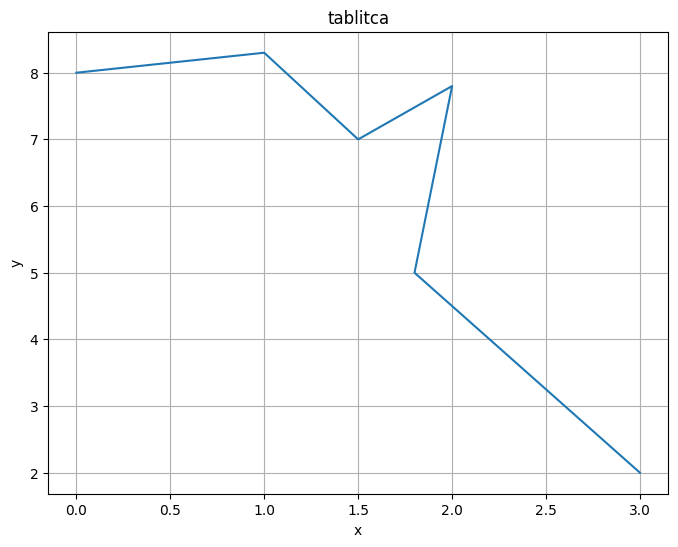

In [81]:
plt.figure(figsize=(8,6))
plt.plot([0,1,1.5,2,1.8,3],[8,8.3,7,7.8,5,2])
plt.xlabel('x')
plt.ylabel('y')
plt.title('tablitca')
plt.grid();

1.1  файл не скачивается
1.2 Изучим стоимости недвижимости <br> динамика продаж домов в зависимости от года постройки

In [82]:
data = df.groupby('yr_built')['price'].sum().reset_index()
data.head

<bound method NDFrame.head of      yr_built        price
0        1900   50580687.0
1        1901   16151142.0
2        1902   18171200.0
3        1903   22124077.0
4        1904   26269049.0
..        ...          ...
111      2011   70787860.0
112      2012   89666047.0
113      2013  136387636.0
114      2014  382178101.0
115      2015   28871836.0

[116 rows x 2 columns]>

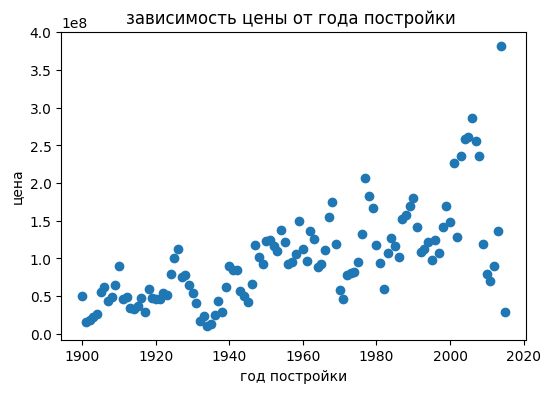

In [83]:
plt.figure(figsize=(6,4))
plt.scatter(data['yr_built'],data['price'])
plt.title('зависимость цены от года постройки ')
plt.xlabel('год постройки')
plt.ylabel('цена');

1.3 Изучите распределение квадратуры жилой

In [84]:
data = df.groupby('sqft_living')['price'].agg(count ='count').reset_index().sort_values(by='sqft_living')
data.head

<bound method NDFrame.head of       sqft_living  count
0             290      1
1             370      1
2             380      1
3             384      1
4             390      2
...           ...    ...
1033         9640      1
1034         9890      1
1035        10040      1
1036        12050      1
1037        13540      1

[1038 rows x 2 columns]>

Text(0, 0.5, 'цена')

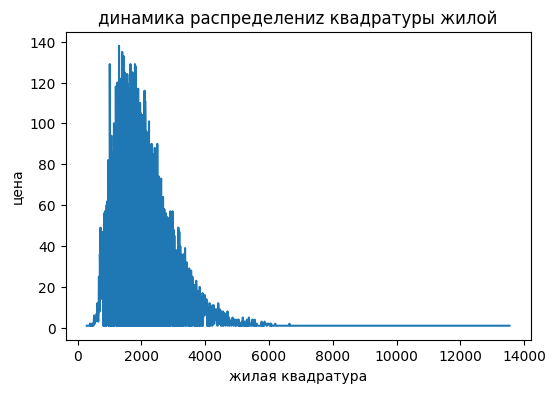

In [85]:
plt.figure(figsize=(6,4))
plt.plot(data['sqft_living'], data['count'])
plt.title('динамика распределениz квадратуры жилой')
plt.xlabel('жилая квадратура')
plt.ylabel('цена')

2.1.4 Изучите распределение года постройки

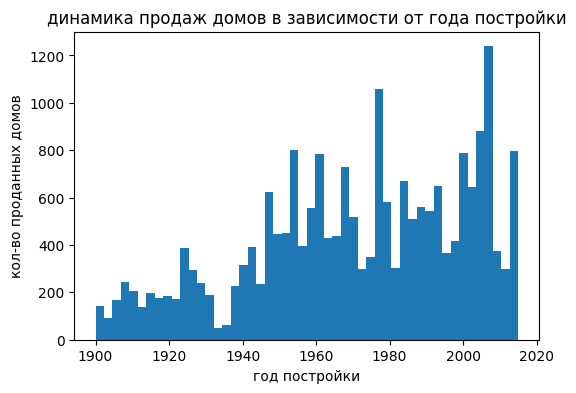

In [86]:
plt.figure(figsize=(6,4))
plt.hist(df['yr_built'], bins=50)
plt.title('динамика продаж домов в зависимости от года постройки')
plt.xlabel('год постройки')
plt.ylabel('кол-во проданных домов');

### Условие 2: 2 задача

2.1 Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

In [87]:
data = df['waterfront'].value_counts().reset_index()
data.head(10)

,index,waterfront
0,0,21450
1,1,163


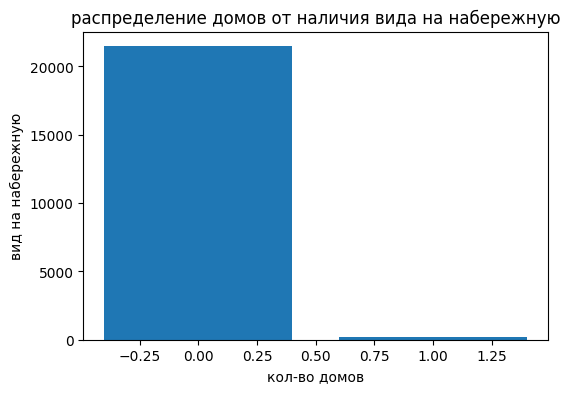

In [88]:
plt.figure(figsize=(6,4))
plt.bar(data['index'],data['waterfront'])

plt.title('распределение домов от наличия вида на набережную')
plt.xlabel('кол-во домов')
plt.ylabel('вид на набережную');


In [89]:
data = pd.crosstab(df['view'], df['waterfront']).reset_index().sort_values(by=0,ascending=False)
data.rename(columns={0:'no', 1:'yes'}, inplace=True)
data.head

<bound method NDFrame.head of waterfront  view     no  yes
0              0  19489    0
2              2    955    8
3              3    491   19
1              1    331    1
4              4    184  135>

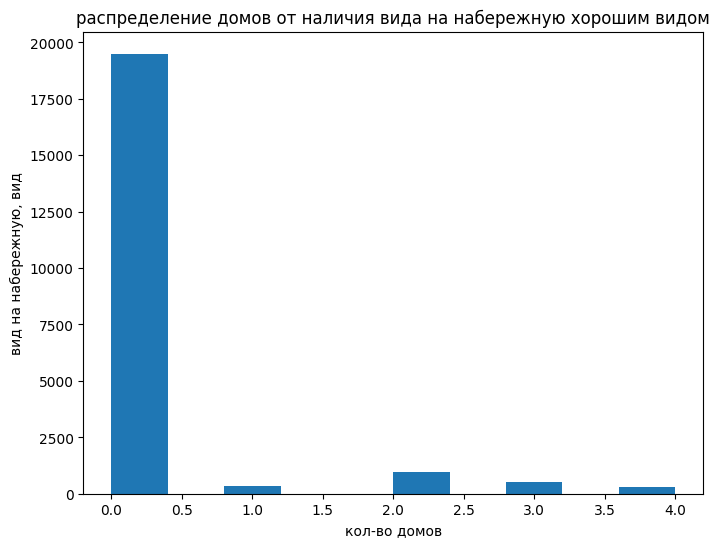

In [90]:
plt.figure(figsize=(8,6))
plt.hist(df['view'])
plt.title('распределение домов от наличия вида на набережную хорошим видом')
plt.xlabel('кол-во домов')
plt.ylabel('вид на набережную, вид');

In [91]:
data = df.groupby('waterfront')['view'].agg(count ='count').reset_index().sort_values(by='waterfront')
data.head

<bound method NDFrame.head of    waterfront  count
0           0  21450
1           1    163>

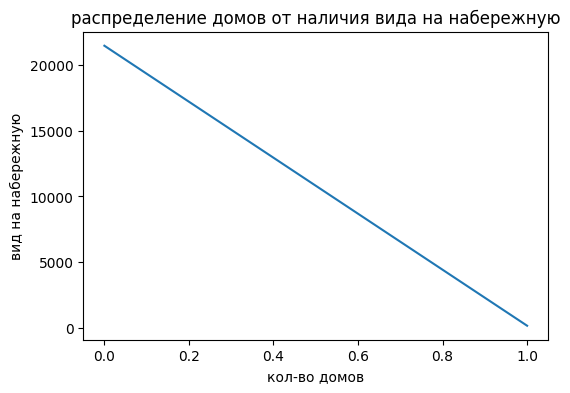

In [92]:
plt.figure(figsize=(6,4))
plt.plot(data['waterfront'], data['count'])
plt.title('распределение домов от наличия вида на набережную')
plt.xlabel('кол-во домов')
plt.ylabel('вид на набережную');

2.2 Изучите распределение этажей домов

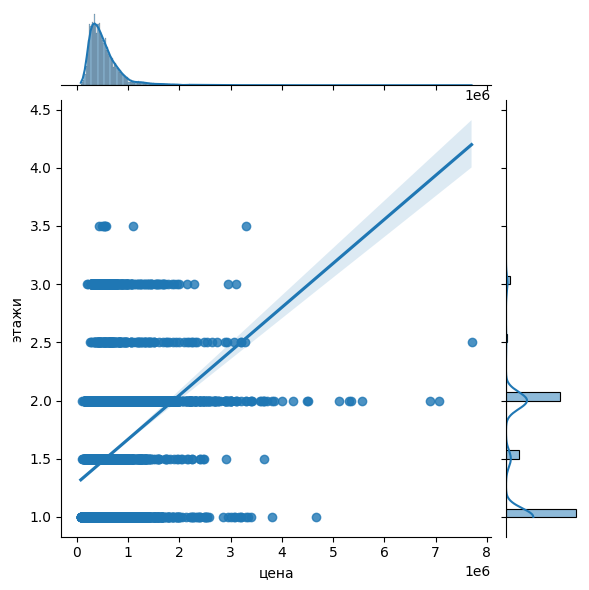

In [93]:
sns.jointplot(x=df['price'], y=df['floors'], kind='reg')

plt.xlabel('цена')
plt.ylabel('этажи');

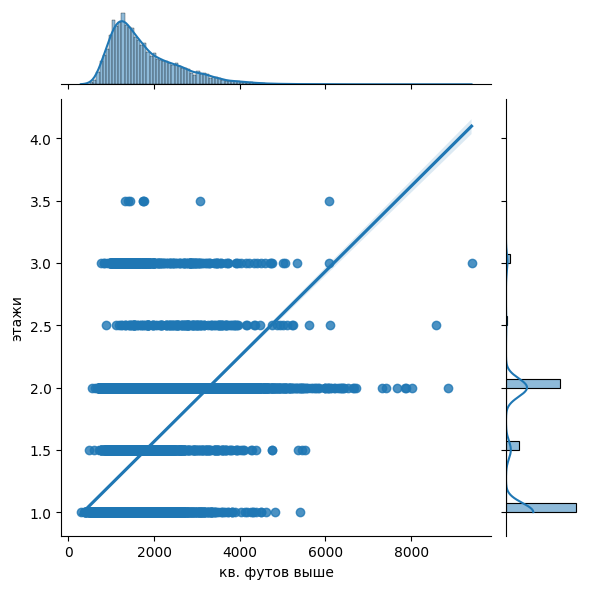

In [94]:
sns.jointplot(x=df['sqft_above'], y=df['floors'], kind='reg')

plt.xlabel('кв. футов выше')
plt.ylabel('этажи');

In [95]:
data = df.groupby('floors')['sqft_lot'].agg(count ='count').reset_index().sort_values(by='floors')
data.head

<bound method NDFrame.head of    floors  count
0     1.0  10680
1     1.5   1910
2     2.0   8241
3     2.5    161
4     3.0    613
5     3.5      8>

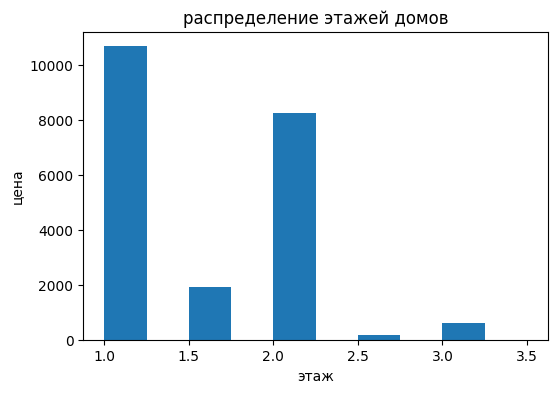

In [96]:
plt.figure(figsize=(6,4))
plt.hist(df['floors'], bins=10)
plt.title('распределение этажей домов')
plt.xlabel('этаж')
plt.ylabel('цена');

2.2 Изучите распределение состояния домов

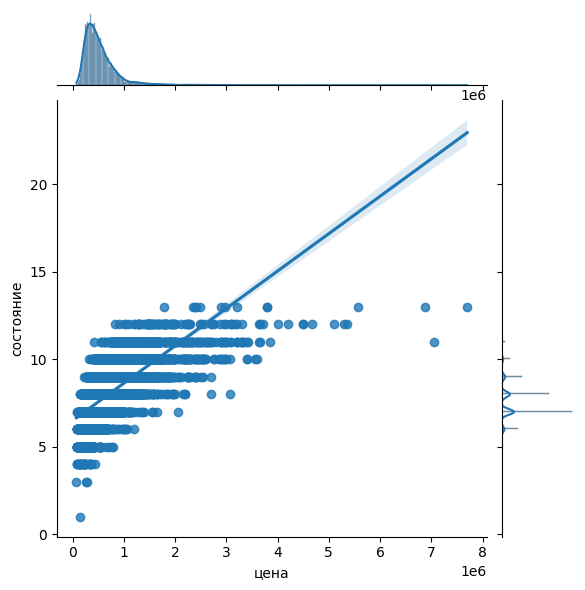

In [97]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg')

plt.xlabel('цена')
plt.ylabel('состояние');

In [98]:
data = df.groupby('grade')['price'].agg(count ='count').reset_index().sort_values(by='grade')
data.head

<bound method NDFrame.head of     grade  count
0       1      1
1       3      3
2       4     29
3       5    242
4       6   2038
5       7   8981
6       8   6068
7       9   2615
8      10   1134
9      11    399
10     12     90
11     13     13>

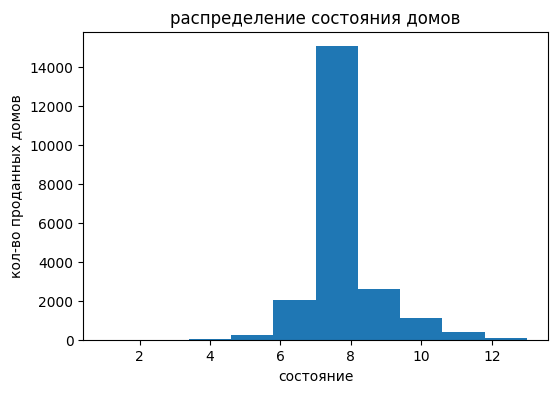

In [100]:
plt.figure(figsize=(6,4))
plt.hist(df['grade'], bins=10)
plt.title('распределение состояния домов')
plt.xlabel('состояние')
plt.ylabel('кол-во проданных домов');

### Условие 3: 3 задача
- Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
- Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями

In [101]:
corr_matrix =df.corr()
corr_matrix =np.round(corr_matrix,1)
corr_matrix[np.abs(corr_matrix)<0.3]=0
corr_matrix

C:\Users\Semen\AppData\Local\Temp\ipykernel_18876\3249162236.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Correlation matrix')

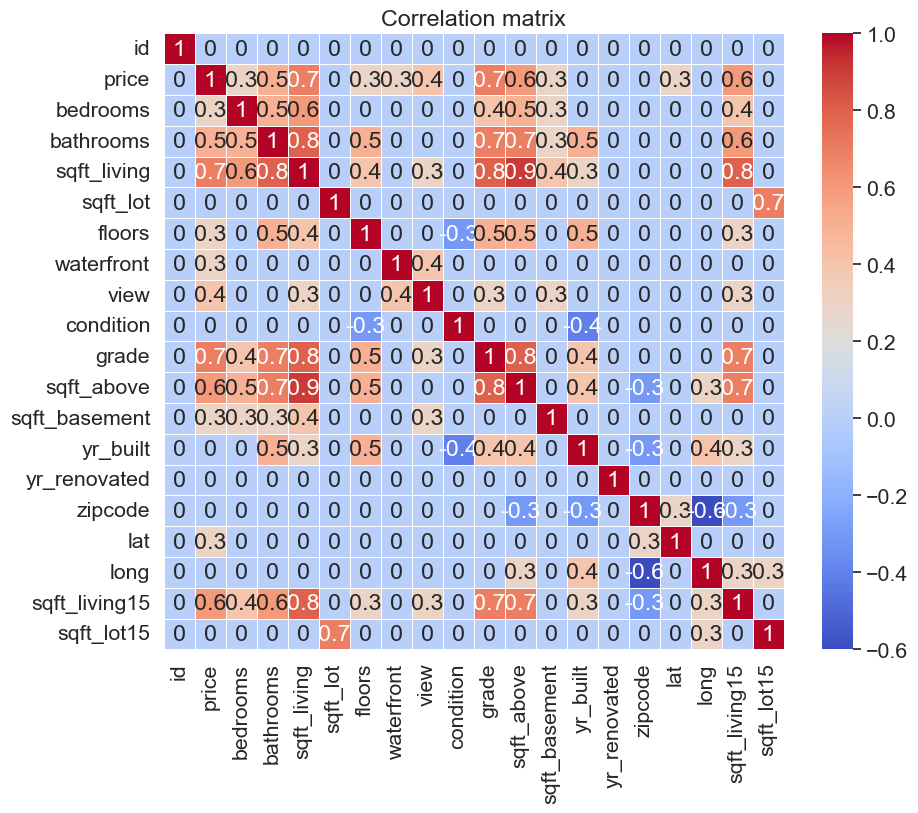

In [102]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix')

- Зависимость цены от жилой площади

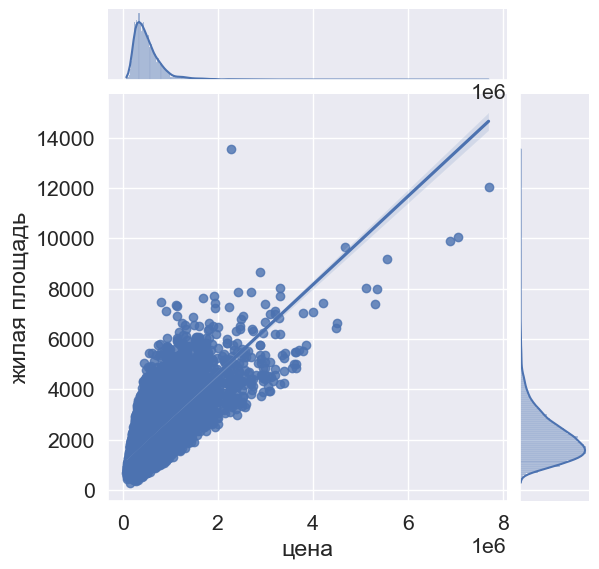

In [103]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');
plt.xlabel('цена')
plt.ylabel('жилая площадь');

- Зависимость цены от жилой площади

In [108]:
data = df.groupby('price')['grade'].sum().reset_index()
data.head

<bound method NDFrame.head of           price  grade
0       75000.0      3
1       78000.0      5
2       80000.0      4
3       81000.0      5
4       82000.0      6
...         ...    ...
4023  5350000.0     12
4024  5570000.0     13
4025  6885000.0     13
4026  7062500.0     11
4027  7700000.0     13

[4028 rows x 2 columns]>

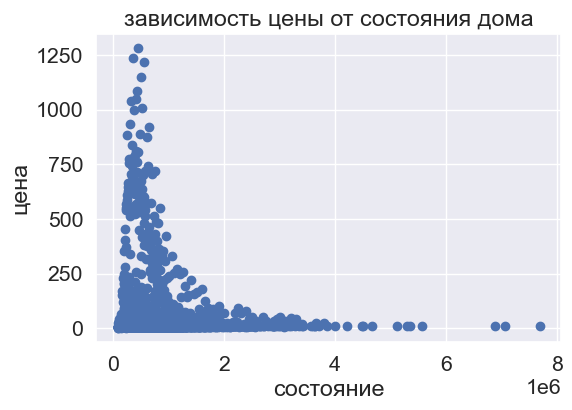

In [110]:
plt.figure(figsize=(6,4))
plt.scatter(data['price'],data['grade'])
plt.title('зависимость цены от состояния дома')
plt.xlabel('состояние')
plt.ylabel('цена');